<a href="https://colab.research.google.com/github/mayatahir/ECGR-5105/blob/master/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

In this homework, we will use US Housing dataset. You will develop linear regression with gradient descent algorithm to estimate the price of the house. In this homework, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

In [1]:
#Importing Releevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Read dataset
csv_file = '/content/drive/My Drive/Housing.csv'
df = pd.read_csv(csv_file)

# Print dataset summary
print(df)
df.shape

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

(545, 13)

In [3]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
# Gradient descent computation
def compute_cost(X, y, theta, lamda = 0):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    m = len(y)  # Number of training examples
    J = 1 / (2 * m) * (np.sum(sqrErrors) + lamda * np.sum(np.square(theta[1:]))) # Apply penalty to the cost function, [1:] -> skipping theta_0
    return J


# Before calling gradient_descent() make sure to split the data into training and validation sets.
#
def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations, lamda = 0):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y_train)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        # print("GD iter: " + str(i))
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(X_train, y_train, theta, lamda) # lamda regularizer only applies to training data
        val_cost_history[i] = compute_cost(X_val, y_val, theta)

    return theta, train_cost_history, val_cost_history


def train_model(df, output, inputs, alpha, iterations, lamda = 0):
    # We specify this so that the train and test data set always have the same rows, respectively
    np.random.seed(22)
    df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

    # Training the model
    y_train = df_train[output].to_numpy()
    X_train = df_train[inputs].to_numpy()

    m = len(y_train)  # Number of training samples

    X_0 = np.ones((m, 1))
    X_train = np.hstack((X_0, X_train))

    y_val = df_test[output].to_numpy()
    X_val = df_test[inputs].to_numpy()

    n = len(y_val)  # Number of validation samples

    X_0 = np.ones((n, 1))
    X_val = np.hstack((X_0, X_val))

    theta = [0.] * (len(inputs) + 1) # theta initialization

    return gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations)


def plot_loss(train_cost_history, val_cost_history, title):
    iterations = len(train_cost_history)
    plt.figure() # New figure
    plt.plot(range(1, iterations + 1), train_cost_history, color='blue',label="Training Loss")
    plt.plot(range(1, iterations + 1), val_cost_history, color='red',label="Validation Loss")
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid(True)

    plt.xlabel('Number of iterations')
    plt.ylabel('Mean Square Error')
    plt.title(title)

    # Print data
    print('train_cost_history =', train_cost_history)
    print('val_cost_history =', val_cost_history)

    # Show the plot
    plt.show()

# Problem 1 (30 Points)
1. a) Develop a gradient descent training and evaluation code, from scratch, that predicts housing price based on the following input variables:
area, bedrooms, bathrooms, stories, parking.
Identify the best parameters for your linear regression model, based on the above input variables.
Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [5]:
# Data selection

df_split = df[['price','area','bedrooms','bathrooms','stories','parking']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


train_cost_history = [1.11634504e+024 1.07910609e+035 1.04310935e+046 1.00831339e+057
 9.74678147e+067 9.42164908e+078 9.10736243e+089 8.80355973e+100
 8.50989126e+111 8.22601896e+122 7.95161605e+133 7.68636665e+144
 7.42996542e+155 7.18211720e+166 6.94253668e+177 6.71094807e+188
 6.48708478e+199 6.27068910e+210 6.06151194e+221 5.85931248e+232
 5.66385799e+243 5.47492345e+254 5.29229137e+265 5.11575152e+276
 4.94510067e+287]
val_cost_history = [1.14111879e+024 1.10305319e+035 1.06625762e+046 1.03068948e+057
 9.96307821e+067 9.63073061e+078 9.30946944e+089 8.99892487e+100
 8.69873942e+111 8.40856754e+122 8.12807518e+133 7.85693947e+144
 7.59484829e+155 7.34149992e+166 7.09660273e+177 6.85987479e+188
 6.63104362e+199 6.40984577e+210 6.19602662e+221 5.98934004e+232
 5.78954810e+243 5.59642079e+254 5.40973582e+265 5.22927826e+276
 5.05484040e+287]


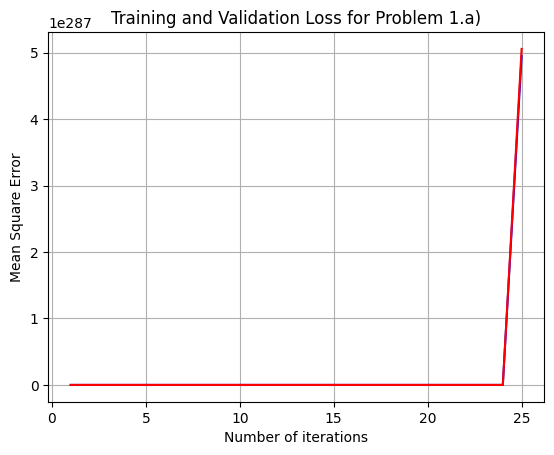

In [6]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price', ['area','bedrooms','bathrooms','stories','parking'], alpha = 0.01, iterations = 25)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 1.a)")

1. b) Develop a gradient descent training and evaluation code, from scratch, that predicts housing price based on the following input variables:
Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea.
Identify the best parameters for your linear regression model, based on the above input variables.
Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.


In [7]:
# Data selection
df_split = df[['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


train_cost_history = [1.11634512e+024 1.07910624e+035 1.04310956e+046 1.00831366e+057
 9.74678471e+067 9.42165282e+078 9.10736664e+089 8.80356437e+100
 8.50989630e+111 8.22602437e+122 7.95162179e+133 7.68637270e+144
 7.42997175e+155 7.18212379e+166 6.94254351e+177 6.71095511e+188
 6.48709200e+199 6.27069649e+210 6.06151947e+221 5.85932015e+232
 5.66386576e+243 5.47493132e+254 5.29229932e+265 5.11575954e+276
 4.94510875e+287]
val_cost_history = [1.14111887e+024 1.10305334e+035 1.06625784e+046 1.03068976e+057
 9.96308151e+067 9.63073443e+078 9.30947373e+089 8.99892960e+100
 8.69874456e+111 8.40857305e+122 8.12808105e+133 7.85694565e+144
 7.59485475e+155 7.34150665e+166 7.09660969e+177 6.85988198e+188
 6.63105099e+199 6.40985331e+210 6.19603432e+221 5.98934787e+232
 5.78955604e+243 5.59642884e+254 5.40974394e+265 5.22928646e+276
 5.05484865e+287]


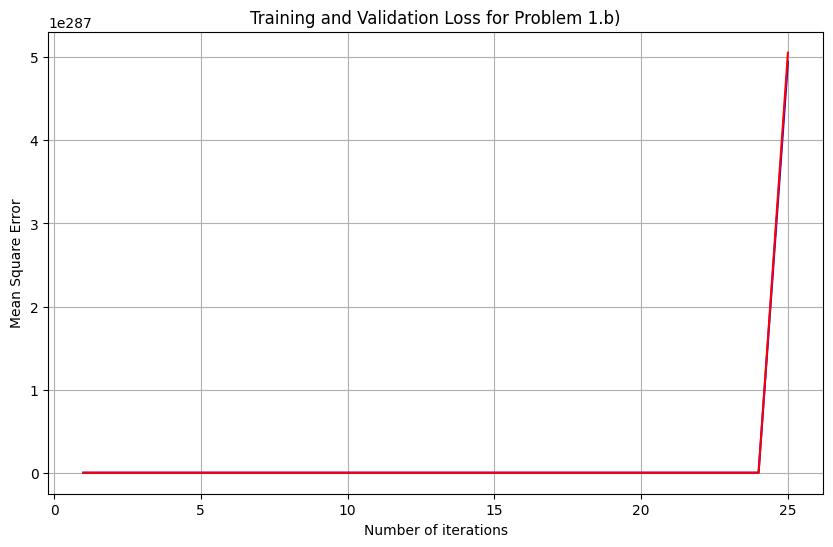

In [8]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea'] \
    , alpha = 0.01, iterations = 25)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 1.b)")

## Problem 2 (30 points)

2. a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. **In both cases, you do not need to normalize the output!**
Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.


### 2.a) Training with Input Normalization

In [9]:
# Data selection and Input Normalization
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667
3,12215000,0.402062,0.6,0.333333,0.333333,1.000000
4,11410000,0.396564,0.6,0.000000,0.333333,0.666667


train_cost_history = [1.29099889e+13 1.25901312e+13 1.22789827e+13 1.19763061e+13
 1.16818705e+13 1.13954513e+13 1.11168299e+13 1.08457938e+13
 1.05821363e+13 1.03256563e+13 1.00761582e+13 9.83345162e+12
 9.59735148e+12 9.36767774e+12 9.14425524e+12 8.92691359e+12
 8.71548706e+12 8.50981444e+12 8.30973890e+12 8.11510789e+12
 7.92577303e+12 7.74158995e+12 7.56241826e+12 7.38812136e+12
 7.21856640e+12 7.05362413e+12 6.89316884e+12 6.73707824e+12
 6.58523336e+12 6.43751849e+12 6.29382108e+12 6.15403162e+12
 6.01804361e+12 5.88575344e+12 5.75706033e+12 5.63186625e+12
 5.51007583e+12 5.39159631e+12 5.27633745e+12 5.16421148e+12
 5.05513302e+12 4.94901901e+12 4.84578866e+12 4.74536337e+12
 4.64766671e+12 4.55262430e+12 4.46016381e+12 4.37021488e+12
 4.28270905e+12 4.19757975e+12 4.11476221e+12 4.03419342e+12
 3.95581210e+12 3.87955865e+12 3.80537506e+12 3.73320493e+12
 3.66299340e+12 3.59468707e+12 3.52823405e+12 3.46358380e+12
 3.40068722e+12 3.33949651e+12 3.27996518e+12 3.22204802e+12
 3.

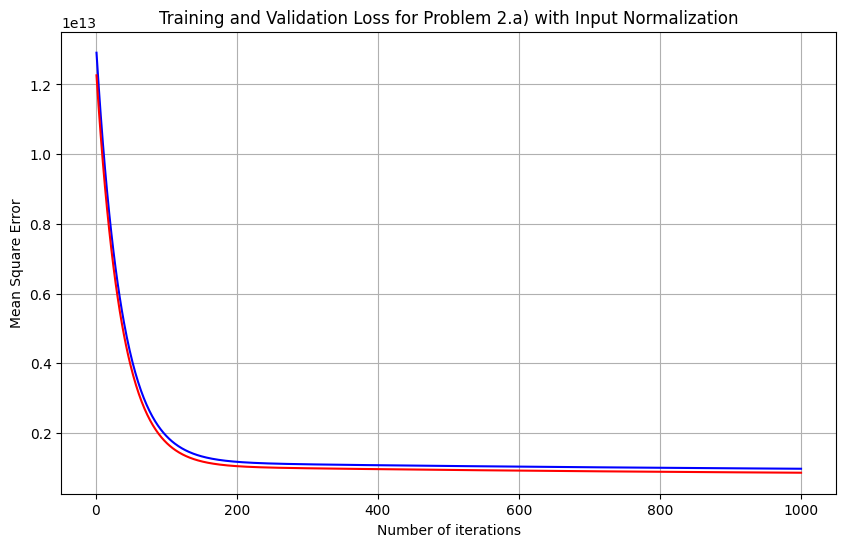

In [10]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.a) with Input Normalization")

### 2.a) Training with Input Standardization

In [11]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_stand = df.copy() # copy df to not modify orignal data frame
df_stand[num_vars] = scaler.fit_transform(df_stand[num_vars])

df_split = df_stand[['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692


train_cost_history = [1.29727833e+13 1.27127162e+13 1.24584563e+13 1.22098646e+13
 1.19668061e+13 1.17291491e+13 1.14967653e+13 1.12695298e+13
 1.10473210e+13 1.08300202e+13 1.06175119e+13 1.04096835e+13
 1.02064255e+13 1.00076307e+13 9.81319516e+12 9.62301721e+12
 9.43699788e+12 9.25504070e+12 9.07705159e+12 8.90293885e+12
 8.73261307e+12 8.56598706e+12 8.40297581e+12 8.24349642e+12
 8.08746803e+12 7.93481181e+12 7.78545082e+12 7.63931007e+12
 7.49631636e+12 7.35639830e+12 7.21948625e+12 7.08551226e+12
 6.95441002e+12 6.82611484e+12 6.70056359e+12 6.57769466e+12
 6.45744793e+12 6.33976471e+12 6.22458772e+12 6.11186107e+12
 6.00153018e+12 5.89354177e+12 5.78784383e+12 5.68438559e+12
 5.58311748e+12 5.48399107e+12 5.38695912e+12 5.29197545e+12
 5.19899500e+12 5.10797375e+12 5.01886870e+12 4.93163787e+12
 4.84624024e+12 4.76263574e+12 4.68078526e+12 4.60065055e+12
 4.52219427e+12 4.44537993e+12 4.37017189e+12 4.29653532e+12
 4.22443618e+12 4.15384121e+12 4.08471793e+12 4.01703458e+12
 3.

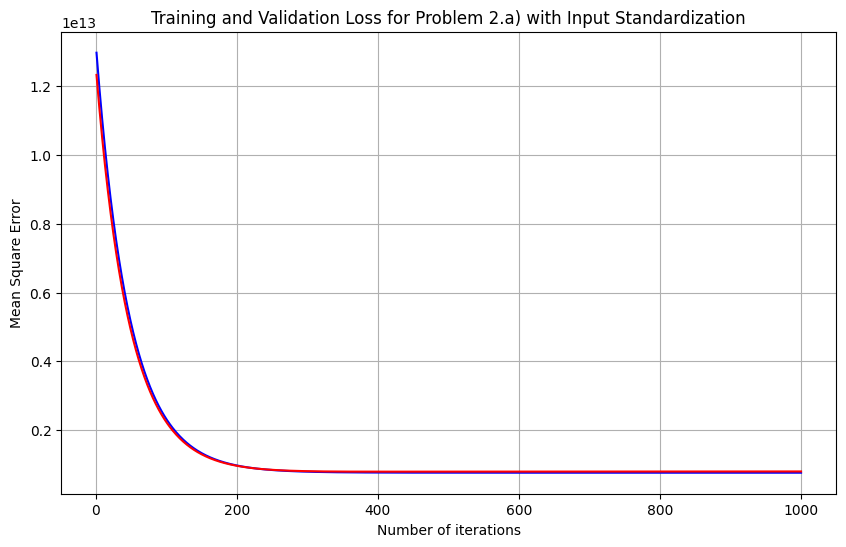

In [12]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.a) with Input Standardization")


2. b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. **Experiment between normalizing and not normalizing the output!**
Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results. **Experiment between normalizing and not normalizing the output!**

### 2.a) Training with Input Normalization

In [13]:
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price'] + num_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
3,12215000,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0
4,11410000,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


train_cost_history = [1.26314594e+13 1.20542389e+13 1.15056430e+13 1.09842504e+13
 1.04887107e+13 1.00177403e+13 9.57011925e+12 9.14468844e+12
 8.74034615e+12 8.35604538e+12 7.99079113e+12 7.64363781e+12
 7.31368677e+12 7.00008397e+12 6.70201779e+12 6.41871691e+12
 6.14944829e+12 5.89351531e+12 5.65025591e+12 5.41904093e+12
 5.19927244e+12 4.99038218e+12 4.79183012e+12 4.60310306e+12
 4.42371325e+12 4.25319718e+12 4.09111434e+12 3.93704610e+12
 3.79059461e+12 3.65138178e+12 3.51904828e+12 3.39325265e+12
 3.27367034e+12 3.15999295e+12 3.05192739e+12 2.94919510e+12
 2.85153137e+12 2.75868462e+12 2.67041577e+12 2.58649762e+12
 2.50671422e+12 2.43086038e+12 2.35874106e+12 2.29017094e+12
 2.22497388e+12 2.16298248e+12 2.10403767e+12 2.04798826e+12
 1.99469058e+12 1.94400809e+12 1.89581103e+12 1.84997608e+12
 1.80638603e+12 1.76492952e+12 1.72550068e+12 1.68799894e+12
 1.65232869e+12 1.61839908e+12 1.58612376e+12 1.55542069e+12
 1.52621187e+12 1.49842321e+12 1.47198427e+12 1.44682812e+12
 1.

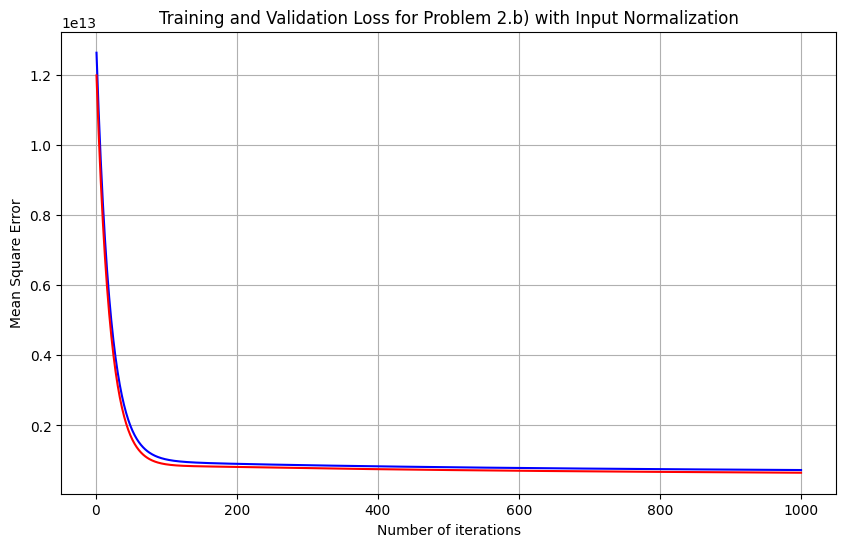

In [14]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.b) with Input Normalization")

### 2b. Training with Input and Output Normalization

In [15]:
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
all_vars = ['price'] + num_vars

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[all_vars] = scaler.fit_transform(df_norm[all_vars])

df_split = df_norm[all_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


train_cost_history = [0.04584908 0.04398835 0.04221963 0.04053836 0.03894018 0.03742099
 0.03597685 0.03460404 0.03329903 0.03205844 0.03087908 0.02975791
 0.02869204 0.02767873 0.02671536 0.02579947 0.02492869 0.02410078
 0.02331362 0.02256518 0.02185355 0.0211769  0.02053348 0.01992166
 0.01933987 0.0187866  0.01826046 0.01776009 0.01728421 0.01683162
 0.01640115 0.0159917  0.01560224 0.01523178 0.01487936 0.0145441
 0.01422515 0.01392169 0.01363296 0.01335822 0.0130968  0.01284801
 0.01261124 0.0123859  0.01217141 0.01196724 0.01177287 0.01158783
 0.01141164 0.01124387 0.01108411 0.01093195 0.01078702 0.01064896
 0.01051744 0.01039212 0.0102727  0.01015889 0.01005041 0.009947
 0.00984841 0.00975439 0.00966473 0.00957921 0.00949761 0.00941976
 0.00934545 0.00927453 0.00920682 0.00914216 0.0090804  0.0090214
 0.00896502 0.00891114 0.00885962 0.00881036 0.00876324 0.00871816
 0.00867502 0.00863372 0.00859417 0.00855628 0.00851998 0.00848518
 0.00845181 0.00841981 0.0083891  0.00835962 

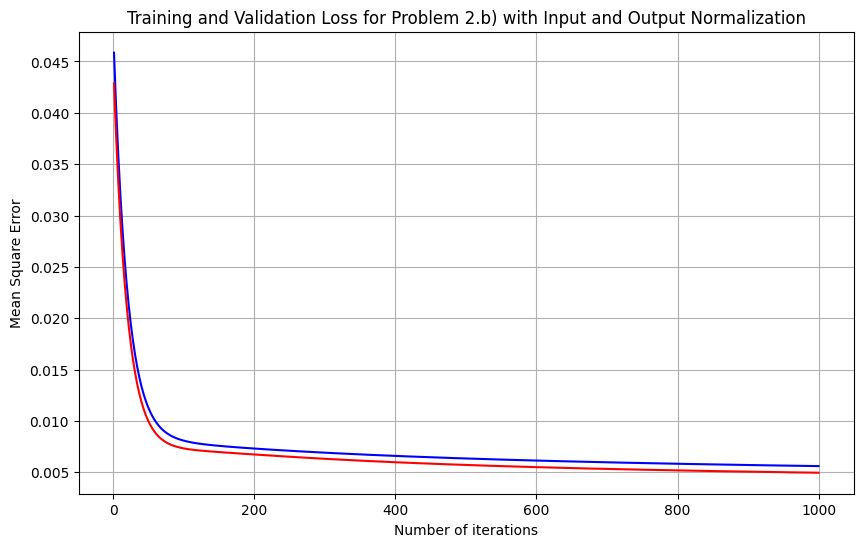

In [16]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.b) with Input and Output Normalization")

### 2b Training with Input Standardization

In [17]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price'] + num_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,12250000,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,12250000,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,12215000,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,11410000,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


train_cost_history = [1.29574807e+13 1.26830477e+13 1.24153076e+13 1.21540731e+13
 1.18991633e+13 1.16504030e+13 1.14076228e+13 1.11706585e+13
 1.09393514e+13 1.07135478e+13 1.04930987e+13 1.02778600e+13
 1.00676920e+13 9.86245940e+12 9.66203107e+12 9.46627996e+12
 9.27508294e+12 9.08832062e+12 8.90587726e+12 8.72764063e+12
 8.55350188e+12 8.38335542e+12 8.21709883e+12 8.05463273e+12
 7.89586066e+12 7.74068903e+12 7.58902696e+12 7.44078624e+12
 7.29588121e+12 7.15422868e+12 7.01574787e+12 6.88036027e+12
 6.74798965e+12 6.61856189e+12 6.49200501e+12 6.36824899e+12
 6.24722582e+12 6.12886935e+12 6.01311526e+12 5.89990099e+12
 5.78916573e+12 5.68085029e+12 5.57489711e+12 5.47125017e+12
 5.36985495e+12 5.27065843e+12 5.17360895e+12 5.07865625e+12
 4.98575140e+12 4.89484674e+12 4.80589587e+12 4.71885360e+12
 4.63367591e+12 4.55031992e+12 4.46874384e+12 4.38890697e+12
 4.31076963e+12 4.23429318e+12 4.15943992e+12 4.08617313e+12
 4.01445700e+12 3.94425662e+12 3.87553793e+12 3.80826775e+12
 3.

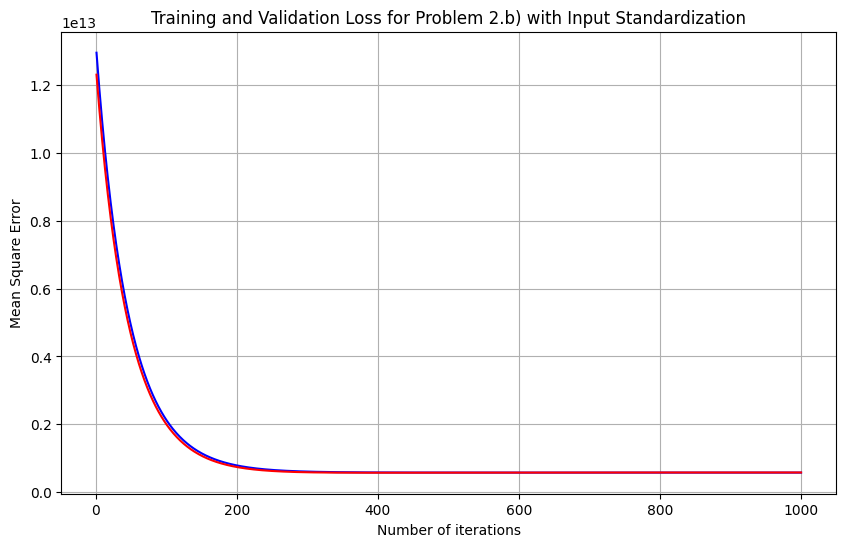

In [18]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.b) with Input Standardization")

### 2b Training with Input and Output Standardization

In [19]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
all_vars = ['price'] + num_vars

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[all_vars] = scaler.fit_transform(df_norm[all_vars])

df_split = df_norm[all_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


train_cost_history = [0.48382457 0.4701019  0.45698494 0.44444674 0.43246151 0.42100466
 0.41005267 0.39958306 0.38957437 0.38000611 0.37085869 0.36211338
 0.35375231 0.34575839 0.33811532 0.33080749 0.32382002 0.31713866
 0.31074984 0.30464055 0.2987984  0.29321151 0.28786857 0.28275876
 0.27787173 0.27319761 0.26872695 0.26445075 0.26036038 0.25644762
 0.25270461 0.24912382 0.24569808 0.24242053 0.23928462 0.23628408
 0.23341294 0.23066547 0.22803622 0.22551996 0.22311172 0.22080673
 0.21860042 0.21648847 0.2144667  0.21253115 0.21067803 0.2089037
 0.2072047  0.20557773 0.20401962 0.20252734 0.20109802 0.19972888
 0.19841729 0.19716073 0.19595679 0.19480317 0.19369767 0.19263819
 0.19162271 0.19064933 0.18971621 0.18882158 0.18796378 0.18714121
 0.18635233 0.18559569 0.18486987 0.18417356 0.18350547 0.18286438
 0.18224912 0.18165858 0.1810917  0.18054745 0.18002486 0.179523
 0.17904098 0.17857796 0.17813311 0.17770566 0.17729486 0.17690002
 0.17652044 0.17615548 0.17580451 0.17546696

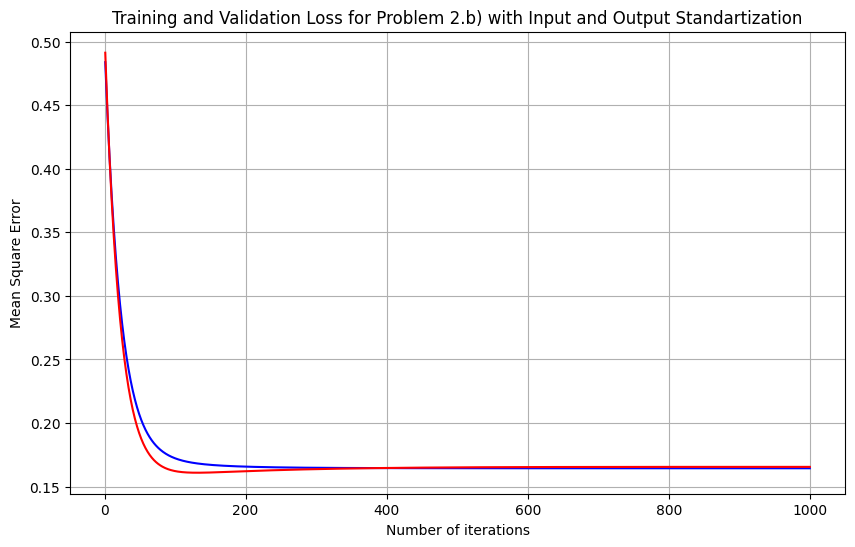

In [20]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss for Problem 2.b) with Input and Output Standartization")

## Problem 3 (40 points)

3. a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient descent logic for your training set, but you don’t need to change your loss for the evaluation set.  
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

### 3a Training with Input Normalization

In [21]:
# Data selection and Input Normalization
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667
3,12215000,0.402062,0.6,0.333333,0.333333,1.000000
4,11410000,0.396564,0.6,0.000000,0.333333,0.666667


train_cost_history = [1.29099889e+13 1.25901312e+13 1.22789827e+13 1.19763061e+13
 1.16818705e+13 1.13954513e+13 1.11168299e+13 1.08457938e+13
 1.05821363e+13 1.03256563e+13 1.00761582e+13 9.83345162e+12
 9.59735148e+12 9.36767774e+12 9.14425524e+12 8.92691359e+12
 8.71548706e+12 8.50981444e+12 8.30973890e+12 8.11510789e+12
 7.92577303e+12 7.74158995e+12 7.56241826e+12 7.38812136e+12
 7.21856640e+12 7.05362413e+12 6.89316884e+12 6.73707824e+12
 6.58523336e+12 6.43751849e+12 6.29382108e+12 6.15403162e+12
 6.01804361e+12 5.88575344e+12 5.75706033e+12 5.63186625e+12
 5.51007583e+12 5.39159631e+12 5.27633745e+12 5.16421148e+12
 5.05513302e+12 4.94901901e+12 4.84578866e+12 4.74536337e+12
 4.64766671e+12 4.55262430e+12 4.46016381e+12 4.37021488e+12
 4.28270905e+12 4.19757975e+12 4.11476221e+12 4.03419342e+12
 3.95581210e+12 3.87955865e+12 3.80537506e+12 3.73320493e+12
 3.66299340e+12 3.59468707e+12 3.52823405e+12 3.46358380e+12
 3.40068722e+12 3.33949651e+12 3.27996518e+12 3.22204802e+12
 3.

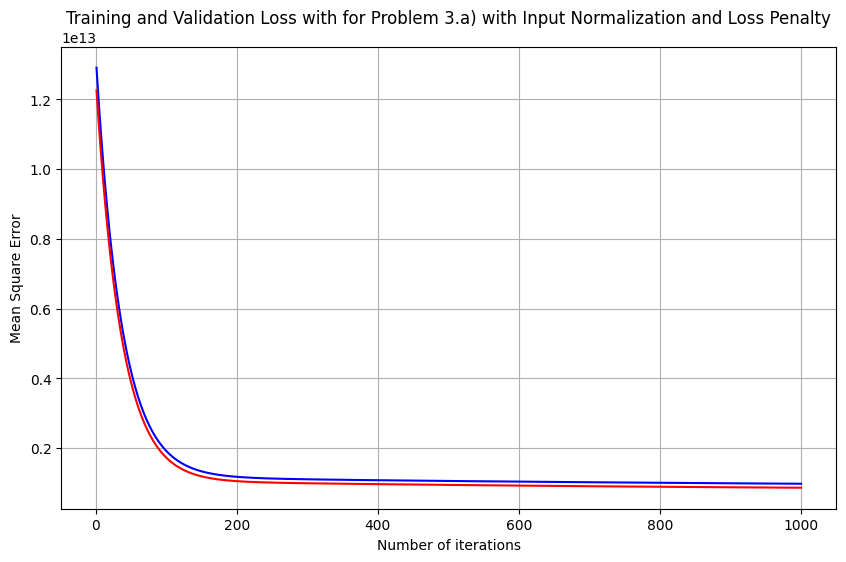

In [22]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "Training and Validation Loss with for Problem 3.a) with Input Normalization and Loss Penalty")

### 3a Training with Input Standardization

In [23]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_stand = df.copy() # copy df to not modify orignal data frame
df_stand[num_vars] = scaler.fit_transform(df_stand[num_vars])

df_split = df_stand[['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df_split.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692


train_cost_history = [1.29727833e+13 1.27127162e+13 1.24584563e+13 1.22098646e+13
 1.19668061e+13 1.17291491e+13 1.14967653e+13 1.12695298e+13
 1.10473210e+13 1.08300202e+13 1.06175119e+13 1.04096835e+13
 1.02064255e+13 1.00076307e+13 9.81319516e+12 9.62301721e+12
 9.43699788e+12 9.25504070e+12 9.07705159e+12 8.90293885e+12
 8.73261307e+12 8.56598706e+12 8.40297581e+12 8.24349642e+12
 8.08746803e+12 7.93481181e+12 7.78545082e+12 7.63931007e+12
 7.49631636e+12 7.35639830e+12 7.21948625e+12 7.08551226e+12
 6.95441002e+12 6.82611484e+12 6.70056359e+12 6.57769466e+12
 6.45744793e+12 6.33976471e+12 6.22458772e+12 6.11186107e+12
 6.00153018e+12 5.89354177e+12 5.78784383e+12 5.68438559e+12
 5.58311748e+12 5.48399107e+12 5.38695912e+12 5.29197545e+12
 5.19899500e+12 5.10797375e+12 5.01886870e+12 4.93163787e+12
 4.84624024e+12 4.76263574e+12 4.68078526e+12 4.60065055e+12
 4.52219427e+12 4.44537993e+12 4.37017189e+12 4.29653532e+12
 4.22443618e+12 4.15384121e+12 4.08471793e+12 4.01703458e+12
 3.

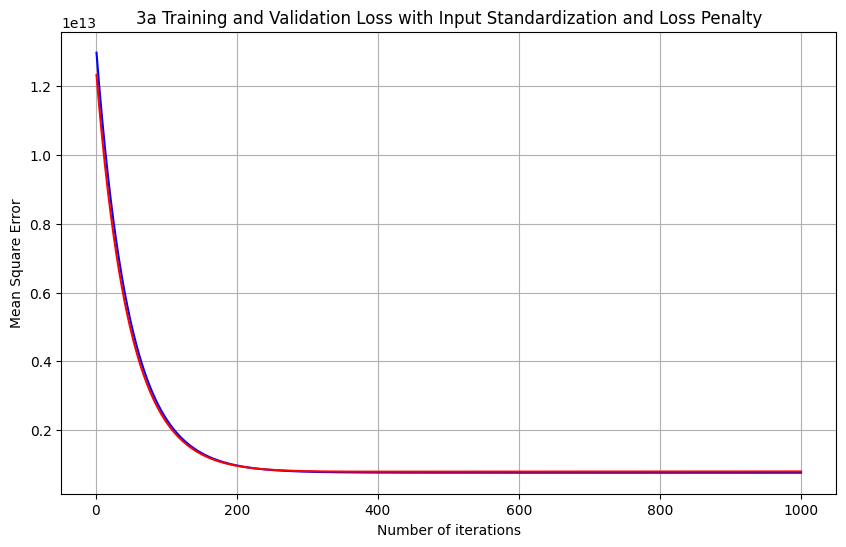

In [24]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "3a Training and Validation Loss with Input Standardization and Loss Penalty")

3. b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient descent logic for your training set, but you don’t need to change your loss for the evaluation set.  
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

### 3b Training with Input Normalization

In [25]:
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price'] + num_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
3,12215000,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0
4,11410000,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


train_cost_history = [1.26314594e+13 1.20542389e+13 1.15056430e+13 1.09842504e+13
 1.04887107e+13 1.00177403e+13 9.57011925e+12 9.14468844e+12
 8.74034615e+12 8.35604538e+12 7.99079113e+12 7.64363781e+12
 7.31368677e+12 7.00008397e+12 6.70201779e+12 6.41871691e+12
 6.14944829e+12 5.89351531e+12 5.65025591e+12 5.41904093e+12
 5.19927244e+12 4.99038218e+12 4.79183012e+12 4.60310306e+12
 4.42371325e+12 4.25319718e+12 4.09111434e+12 3.93704610e+12
 3.79059461e+12 3.65138178e+12 3.51904828e+12 3.39325265e+12
 3.27367034e+12 3.15999295e+12 3.05192739e+12 2.94919510e+12
 2.85153137e+12 2.75868462e+12 2.67041577e+12 2.58649762e+12
 2.50671422e+12 2.43086038e+12 2.35874106e+12 2.29017094e+12
 2.22497388e+12 2.16298248e+12 2.10403767e+12 2.04798826e+12
 1.99469058e+12 1.94400809e+12 1.89581103e+12 1.84997608e+12
 1.80638603e+12 1.76492952e+12 1.72550068e+12 1.68799894e+12
 1.65232869e+12 1.61839908e+12 1.58612376e+12 1.55542069e+12
 1.52621187e+12 1.49842321e+12 1.47198427e+12 1.44682812e+12
 1.

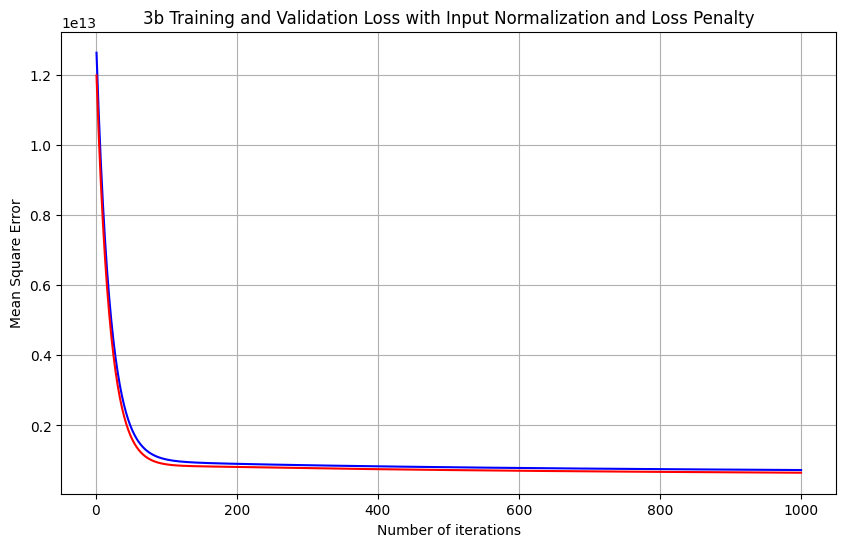

In [26]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "3b Training and Validation Loss with Input Normalization and Loss Penalty")

### 3b Training with Input and Output Normalization

In [27]:
scaler = MinMaxScaler() # Normalization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
all_vars = ['price'] + num_vars

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[all_vars] = scaler.fit_transform(df_norm[all_vars])

df_split = df_norm[all_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


train_cost_history = [0.04584908 0.04398835 0.04221963 ... 0.00523383 0.00523325 0.00523268]
val_cost_history = [0.04286317 0.04105646 0.03934079 ... 0.00461707 0.00461657 0.00461607]


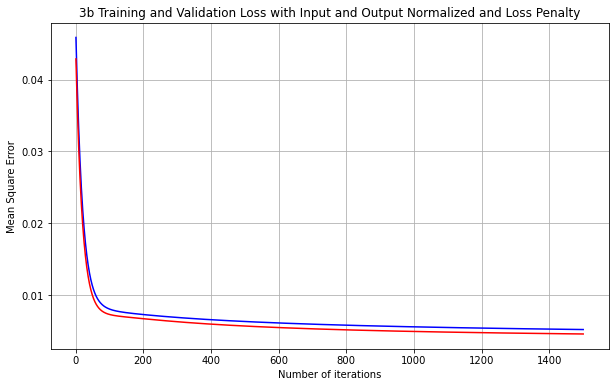

In [ ]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "3b Training and Validation Loss with Input and Output Normalization and Loss Penalty")

### 3b Training with Input Standardization

In [28]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[num_vars] = scaler.fit_transform(df_norm[num_vars])

df_split = df_norm[['price'] + num_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,12250000,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,12250000,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,12215000,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,11410000,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


train_cost_history = [1.29574807e+13 1.26830477e+13 1.24153076e+13 1.21540731e+13
 1.18991633e+13 1.16504030e+13 1.14076228e+13 1.11706585e+13
 1.09393514e+13 1.07135478e+13 1.04930987e+13 1.02778600e+13
 1.00676920e+13 9.86245940e+12 9.66203107e+12 9.46627996e+12
 9.27508294e+12 9.08832062e+12 8.90587726e+12 8.72764063e+12
 8.55350188e+12 8.38335542e+12 8.21709883e+12 8.05463273e+12
 7.89586066e+12 7.74068903e+12 7.58902696e+12 7.44078624e+12
 7.29588121e+12 7.15422868e+12 7.01574787e+12 6.88036027e+12
 6.74798965e+12 6.61856189e+12 6.49200501e+12 6.36824899e+12
 6.24722582e+12 6.12886935e+12 6.01311526e+12 5.89990099e+12
 5.78916573e+12 5.68085029e+12 5.57489711e+12 5.47125017e+12
 5.36985495e+12 5.27065843e+12 5.17360895e+12 5.07865625e+12
 4.98575140e+12 4.89484674e+12 4.80589587e+12 4.71885360e+12
 4.63367591e+12 4.55031992e+12 4.46874384e+12 4.38890697e+12
 4.31076963e+12 4.23429318e+12 4.15943992e+12 4.08617313e+12
 4.01445700e+12 3.94425662e+12 3.87553793e+12 3.80826775e+12
 3.

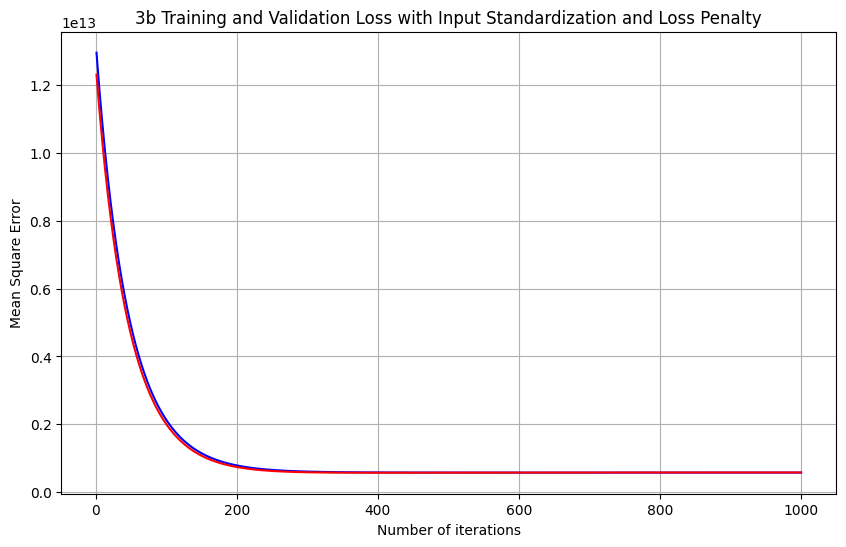

In [29]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "3b Training and Validation Loss with Input Standardization and Loss Penalty")

### 3b Training with Input and Output Standardization

In [30]:
scaler = StandardScaler() # Standardization Scaler
# Apply standardization scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
all_vars = ['price'] + num_vars

df_norm = df.copy() # copy df to not modify orignal data frame
df_norm[all_vars] = scaler.fit_transform(df_norm[all_vars])

df_split = df_norm[all_vars]
df_split.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


train_cost_history = [0.48382457 0.4701019  0.45698494 0.44444674 0.43246151 0.42100466
 0.41005267 0.39958306 0.38957437 0.38000611 0.37085869 0.36211338
 0.35375231 0.34575839 0.33811532 0.33080749 0.32382002 0.31713866
 0.31074984 0.30464055 0.2987984  0.29321151 0.28786857 0.28275876
 0.27787173 0.27319761 0.26872695 0.26445075 0.26036038 0.25644762
 0.25270461 0.24912382 0.24569808 0.24242053 0.23928462 0.23628408
 0.23341294 0.23066547 0.22803622 0.22551996 0.22311172 0.22080673
 0.21860042 0.21648847 0.2144667  0.21253115 0.21067803 0.2089037
 0.2072047  0.20557773 0.20401962 0.20252734 0.20109802 0.19972888
 0.19841729 0.19716073 0.19595679 0.19480317 0.19369767 0.19263819
 0.19162271 0.19064933 0.18971621 0.18882158 0.18796378 0.18714121
 0.18635233 0.18559569 0.18486987 0.18417356 0.18350547 0.18286438
 0.18224912 0.18165858 0.1810917  0.18054745 0.18002486 0.179523
 0.17904098 0.17857796 0.17813311 0.17770566 0.17729486 0.17690002
 0.17652044 0.17615548 0.17580451 0.17546696

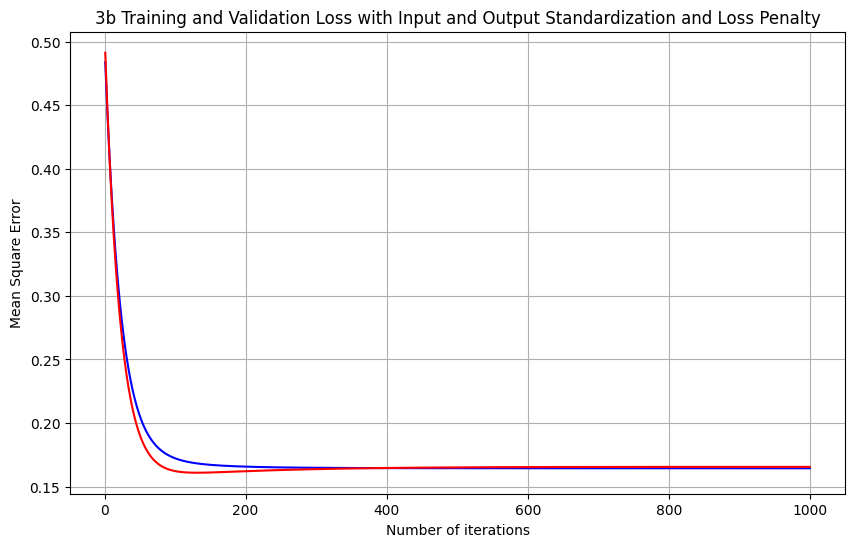

In [31]:
theta, train_cost_history, val_cost_history = train_model(df_split, 'price' \
    , num_vars \
    , alpha = 0.01, iterations = 1000, lamda = 10)
plot_loss(train_cost_history, val_cost_history, "3b Training and Validation Loss with Input and Output Standardization and Loss Penalty")